## NYC RESTAURANT INSPECTION RESULTS

### Importing libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [18]:
nyc = pd.read_csv(r"C:\Users\WELCOME\Downloads\NYC_Restaurant.csv")
nyc

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50114537,MAMA'S CUPBOARD,Manhattan,42,WEST 42 STREET,10036.0,6469191465,NaN,01-01-1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
1,50164148,TIENDA CHICOJ,Queens,10840,ROOSEVELT AVE,11368.0,7189166374,NaN,01-01-1900,NaN,...,NaN,40.750845,-73.858280,404.0,21.0,40100.0,4307718.0,4.019960e+09,QN26,NaN
2,50169870,TEX'S CHICKEN & BURGERS,Queens,21712,MERRICK BLVD,11413.0,9178850048,NaN,01-01-1900,NaN,...,NaN,40.679915,-73.752087,413.0,31.0,35800.0,4279942.0,4.130110e+09,QN66,NaN
3,50132087,FANTASTIC BEASTS,Queens,36-10,UNION STREET,11354.0,2538807717,NaN,01-01-1900,NaN,...,NaN,40.763482,-73.828056,407.0,20.0,86900.0,4112354.0,4.049770e+09,QN22,NaN
4,50172040,BROAD STREET DELI,Manhattan,270,PARK AVENUE,10017.0,7043286780,NaN,01-01-1900,NaN,...,NaN,40.755634,-73.975109,105.0,4.0,9400.0,1035421.0,1.012830e+09,MN17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290017,50121962,BURGER KING,Brooklyn,9006,CHURCH AVENUE,11236.0,7184985574,Hamburgers,06/17/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.652872,-73.919806,317.0,42.0,88800.0,3103358.0,3.047110e+09,BK96,NaN
290018,50150281,MADMAN ESPRESSO,Manhattan,721,BROADWAY,10003.0,3477811121,Coffee/Tea,02-10-2025,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.729306,-73.993502,102.0,2.0,5700.0,1088447.0,1.005470e+09,MN23,NaN
290019,40949905,KA WAH BAKERY,Manhattan,9,ELDRIDGE STREET,10002.0,2122260133,Chinese,07/13/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.714660,-73.993770,103.0,1.0,1600.0,1003772.0,1.002920e+09,MN27,NaN
290020,50121766,CROSSBAR / SOCCER POST UPPER WESTSIDE,Manhattan,250,WEST 86 STREET,10024.0,2126522238,American,11/14/2022,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.788484,-73.976942,107.0,6.0,17100.0,1081052.0,1.012330e+09,MN12,NaN


### Data Understanding


In [19]:
nyc['Location Point1'].unique()

array([nan])

In [20]:
nyc['CRITICAL FLAG'].unique()

array(['Not Applicable', 'Critical', 'Not Critical'], dtype=object)

In [21]:
nyc['GRADE'].unique()

array([nan, 'A', 'P', 'Z', 'C', 'N', 'B'], dtype=object)

In [22]:
nyc.shape

(290022, 27)

In [23]:
nyc.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')

#### Feature Description
- CAMIS – A unique ID number for each restaurant.
- DBA – The restaurant’s name.
- BORO – The part of the city (borough) it’s in.
- BUILDING – The building number of the restaurant.
- STREET – The street name of the restaurant.
- ZIPCODE – The area’s postal code.
- PHONE – The restaurant’s phone number.
- CUISINE DESCRIPTION – The type of food the restaurant serves.
- INSPECTION DATE – The date of the health inspection.
- ACTION – What happened after the inspection.
- VIOLATION CODE – The code for the rule that was broken.
- VIOLATION DESCRIPTION – A short note about what was wrong.
- CRITICAL FLAG – Shows if the problem was serious or not.
- SCORE – The inspection score given to the restaurant.
- GRADE – The letter grade (A, B, C) based on the score.
- GRADE DATE – The date the grade was given.
- RECORD DATE – The date this information was recorded.
- INSPECTION TYPE – What kind of inspection it was (first, follow-up, etc.).
- Latitude – The north–south location on the map.
- Longitude – The east–west location on the map.
- Community Board – The local community area number.
- Council District – The city council area number.
- Census Tract – The small area used for population data.
- BIN – A city number for the building.
- BBL – A property ID made of borough, block, and lot numbers.
- NTA – The neighborhood area name or code.
- Location Point1 – The map point combining latitude and longitude.

In [24]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290022 entries, 0 to 290021
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  290022 non-null  int64  
 1   DBA                    290015 non-null  object 
 2   BORO                   290022 non-null  object 
 3   BUILDING               289516 non-null  object 
 4   STREET                 290021 non-null  object 
 5   ZIPCODE                287205 non-null  float64
 6   PHONE                  290016 non-null  object 
 7   CUISINE DESCRIPTION    286337 non-null  object 
 8   INSPECTION DATE        290022 non-null  object 
 9   ACTION                 286337 non-null  object 
 10  VIOLATION CODE         284189 non-null  object 
 11  VIOLATION DESCRIPTION  284189 non-null  object 
 12  CRITICAL FLAG          290022 non-null  object 
 13  SCORE                  274080 non-null  float64
 14  GRADE                  141303 non-nu

In [25]:
nyc.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50114537,MAMA'S CUPBOARD,Manhattan,42,WEST 42 STREET,10036.0,6469191465,NaN,01-01-1900,NaN,...,NaN,40.754068,-73.982321,105.0,4.0,8400.0,1085593.0,1.012570e+09,MN17,NaN
1,50164148,TIENDA CHICOJ,Queens,10840,ROOSEVELT AVE,11368.0,7189166374,NaN,01-01-1900,NaN,...,NaN,40.750845,-73.858280,404.0,21.0,40100.0,4307718.0,4.019960e+09,QN26,NaN
2,50169870,TEX'S CHICKEN & BURGERS,Queens,21712,MERRICK BLVD,11413.0,9178850048,NaN,01-01-1900,NaN,...,NaN,40.679915,-73.752087,413.0,31.0,35800.0,4279942.0,4.130110e+09,QN66,NaN
3,50132087,FANTASTIC BEASTS,Queens,36-10,UNION STREET,11354.0,2538807717,NaN,01-01-1900,NaN,...,NaN,40.763482,-73.828056,407.0,20.0,86900.0,4112354.0,4.049770e+09,QN22,NaN
4,50172040,BROAD STREET DELI,Manhattan,270,PARK AVENUE,10017.0,7043286780,NaN,01-01-1900,NaN,...,NaN,40.755634,-73.975109,105.0,4.0,9400.0,1035421.0,1.012830e+09,MN17,NaN


In [26]:
nyc.tail()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
290017,50121962,BURGER KING,Brooklyn,9006,CHURCH AVENUE,11236.0,7184985574,Hamburgers,06/17/2022,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.652872,-73.919806,317.0,42.0,88800.0,3103358.0,3.047110e+09,BK96,NaN
290018,50150281,MADMAN ESPRESSO,Manhattan,721,BROADWAY,10003.0,3477811121,Coffee/Tea,02-10-2025,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.729306,-73.993502,102.0,2.0,5700.0,1088447.0,1.005470e+09,MN23,NaN
290019,40949905,KA WAH BAKERY,Manhattan,9,ELDRIDGE STREET,10002.0,2122260133,Chinese,07/13/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.714660,-73.993770,103.0,1.0,1600.0,1003772.0,1.002920e+09,MN27,NaN
290020,50121766,CROSSBAR / SOCCER POST UPPER WESTSIDE,Manhattan,250,WEST 86 STREET,10024.0,2126522238,American,11/14/2022,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.788484,-73.976942,107.0,6.0,17100.0,1081052.0,1.012330e+09,MN12,NaN
290021,41703865,SAFFRON,Queens,4404,BROADWAY,11103.0,7182556310,Indian,08/16/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.757393,-73.915669,401.0,26.0,15900.0,4012369.0,4.007070e+09,QN70,NaN


## Data Cleaning

In [27]:
## Dropping duplicates
nyc = nyc.drop_duplicates()

### Dropping features that are unwanted for analysis.

In [28]:
nyc = nyc.drop(['CAMIS'], axis = 1)
nyc = nyc.drop(['DBA'], axis = 1)
nyc = nyc.drop(['BUILDING'], axis = 1)
nyc = nyc.drop(['STREET'], axis = 1)
nyc = nyc.drop(['ZIPCODE'], axis = 1)
nyc = nyc.drop(['PHONE'], axis = 1)
nyc = nyc.drop(['VIOLATION CODE'], axis = 1)
nyc = nyc.drop(['RECORD DATE'], axis = 1)
nyc = nyc.drop(['Latitude'], axis = 1)
nyc = nyc.drop(['Longitude'], axis = 1)
nyc = nyc.drop(['Community Board'], axis = 1)
nyc = nyc.drop(['Council District'], axis = 1)
nyc = nyc.drop(['Census Tract'], axis = 1)
nyc = nyc.drop(['BIN'], axis = 1)
nyc = nyc.drop(['BBL'], axis = 1)
nyc = nyc.drop(['NTA'], axis = 1)
nyc = nyc.drop("Location Point1", axis = 1)

### After Dropping unwanted features

In [29]:
nyc.columns

Index(['BORO', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'INSPECTION TYPE'],
      dtype='object')

In [30]:
nyc.shape

(290016, 10)

### Checking datatypes of features

In [31]:
nyc.dtypes

BORO                      object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
INSPECTION TYPE           object
dtype: object

### Converting appropriate datatypes

In [32]:
nyc['SCORE'] = pd.to_numeric(nyc['SCORE'], errors='coerce')
nyc['INSPECTION DATE'] = pd.to_datetime(nyc['INSPECTION DATE'], errors='coerce')
nyc['GRADE DATE'] = pd.to_datetime(nyc['GRADE DATE'], errors='coerce')

### Checking null values in the features

In [33]:
nyc.isnull().sum()

BORO                          0
CUISINE DESCRIPTION        3685
INSPECTION DATE          174410
ACTION                     3685
VIOLATION DESCRIPTION      5833
CRITICAL FLAG                 0
SCORE                     15942
GRADE                    148713
GRADE DATE               239314
INSPECTION TYPE            3685
dtype: int64

### Filling Categorical features with 'Not Available'

In [34]:
cat_cols = ['CUISINE DESCRIPTION','VIOLATION DESCRIPTION','INSPECTION TYPE','ACTION']
nyc[cat_cols] = nyc[cat_cols].fillna('Not Available')

In [35]:
nyc['GRADE'].fillna(nyc['GRADE'].mode()[0], inplace = True)

### Filling Numerical features with mean(Average) value

In [36]:
nyc['SCORE'] = nyc['SCORE'].fillna(nyc['SCORE'].mean())

### Filling Date features with default placeholder date (not real inspection data)

In [37]:
nyc['INSPECTION DATE'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
nyc['GRADE DATE'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

In [38]:
nyc.isnull().sum().sum()

np.int64(0)

In [39]:
nyc.dtypes

BORO                             object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
INSPECTION TYPE                  object
dtype: object

### Checking Outliers

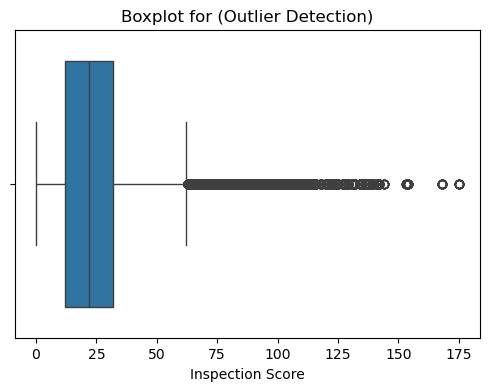

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x=nyc['SCORE'])
plt.title("Boxplot for (Outlier Detection)")
plt.xlabel("Inspection Score")
plt.show()

### Using INTERQUARTILE (IQR) Method to remove outliers.

In [41]:
Q1 = nyc['SCORE'].quantile(0.25)
Q3 = nyc['SCORE'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
median_val = nyc['SCORE'].median()

# Replace outliers with median
nyc.loc[(nyc['SCORE'] < lower_limit) | (nyc['SCORE'] > upper_limit), 'SCORE'] = median_val
print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")
outliers_remaining = nyc[(nyc['SCORE'] < lower_limit) | (nyc['SCORE'] > upper_limit)]
print("Outliers remaining:", outliers_remaining.shape[0])

Lower limit: -18.0, Upper limit: 62.0
Outliers remaining: 0


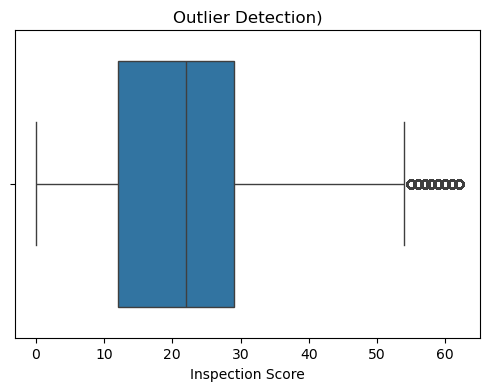

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(x=nyc['SCORE'])
plt.title("Outlier Detection)")
plt.xlabel("Inspection Score")
plt.show()

In [43]:
Q1 = nyc['SCORE'].quantile(0.25)
Q3 = nyc['SCORE'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
median_val = nyc['SCORE'].median()

# Replace outliers with median
nyc.loc[(nyc['SCORE'] < lower_limit) | (nyc['SCORE'] > upper_limit), 'SCORE'] = median_val
print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")
outliers_remaining = nyc[(nyc['SCORE'] < lower_limit) | (nyc['SCORE'] > upper_limit)]
print("Outliers remaining:", outliers_remaining.shape[0])

Lower limit: -13.5, Upper limit: 54.5
Outliers remaining: 0


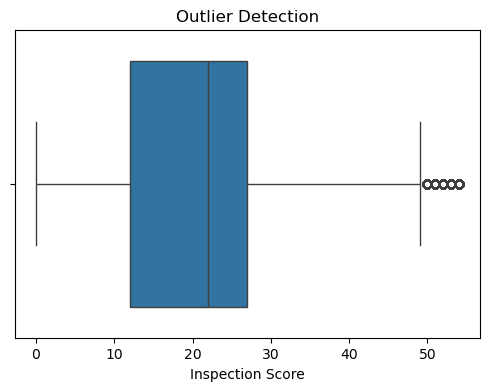

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(x=nyc['SCORE'])
plt.title("Outlier Detection")
plt.xlabel("Inspection Score")
plt.show()

In [45]:
Q1 = nyc['SCORE'].quantile(0.25)
Q3 = nyc['SCORE'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
median_val = nyc['SCORE'].median()

# Replace outliers with median
nyc.loc[(nyc['SCORE'] < lower_limit) | (nyc['SCORE'] > upper_limit), 'SCORE'] = median_val
print(f"Lower limit: {lower_limit}, Upper limit: {upper_limit}")
outliers_remaining = nyc[(nyc['SCORE'] < lower_limit) | (nyc['SCORE'] > upper_limit)]
print("Outliers remaining:", outliers_remaining.shape[0])

Lower limit: -10.5, Upper limit: 49.5
Outliers remaining: 0


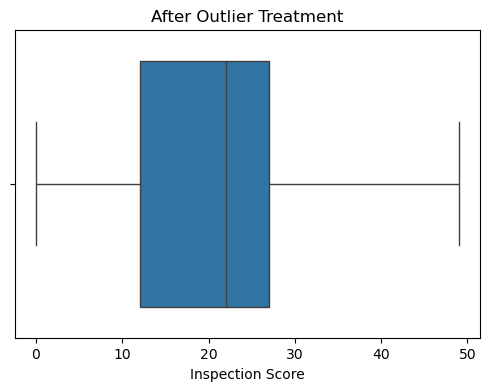

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(x=nyc['SCORE'])
plt.title("After Outlier Treatment")
plt.xlabel("Inspection Score")
plt.show()

### Insights
- The Boxplot of SCORE contains no outliers.
- The majority of 'Inspection Score' are clustered between 10 to 30.
- The Median value is around 22.

### Statistical Analysis

### 1.Independent Sample t-test

#### Comparing SCORE between GRADE A and GRADE B Restaurants
- Null Hypothesis Ho : No Significant difference between GRADE A and GRADE B SCORES
- Alternate Hypothesis Ha : Significant difference between GRADE A and GRADE B SCORES

In [47]:
from scipy.stats import ttest_ind

group_A = nyc[nyc['GRADE'] == 'A']['SCORE']
group_B = nyc[nyc['GRADE'] == 'B']['SCORE']

t_stat, p_value = ttest_ind(group_A, group_B, nan_policy='omit')

print("Independent T-Test")
print("T-test statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject H0 : No Significant difference between Grade A and Grade B scores")
else:
    print("Failed to reject H0 : Significant difference between Grade A and Grade B scores")

Independent T-Test
T-test statistic: -28.760588603340267
P-value: 1.282036296488789e-181
Reject H0 : No Significant difference between Grade A and Grade B scores


### Insights :
- Here the p_value is 0.0000 which is less than 0.05.
- This means that SCORES of GRADE A and GRADE B have significant differences.

### 2.Chi Square Test

#### Taking two categorical Features ACTION and GRADE to check they are independent or not
- Null Hypothesis Ho : ACTION and GRADE are independent
- Alternate Hypothesis Ha : ACTION and GRADE are dependent

In [48]:
from scipy import stats
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(nyc['ACTION'], nyc['GRADE'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Contingency Table:\n", contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("\nP-value:", p_val)
print("\nDegrees of Freedom:", dof)
print("\nExpected Frequencies:\n", expected)
print("\n")

alpha = 0.05

if p_value < alpha :
    print("Reject H0 : ACTION and GRADE are Independent")
else:
    print("Failed to reject H0 : ACTION and GRADE are not Independent")

Contingency Table:
 GRADE                                                    A      B      C  \
ACTION                                                                     
Establishment Closed by DOHMH. Violations were ...    9746      0     16   
Establishment re-closed by DOHMH.                     1325      0      0   
Establishment re-opened by DOHMH.                      208      2    394   
No violations were recorded at the time of this...    2128      0      0   
Not Available                                         3685      0      0   
Violations were cited in the following area(s).     227586  17644  11746   

GRADE                                                  N    P     Z  
ACTION                                                               
Establishment Closed by DOHMH. Violations were ...   312    0     0  
Establishment re-closed by DOHMH.                      0    0     0  
Establishment re-opened by DOHMH.                      5  915   377  
No violations were re

### Insights:
- Here p_value is 0.0 which is less than 0.05.
- THis means that ACTION and GRADE are dependent.
- Here the Degrees of Freedom is 25.
- Which means there are 25 independent values of information available in the data to estimate variability.

### Descriptive Analysis

In [49]:
nyc['SCORE'].describe()

count    290016.000000
mean         20.688723
std          10.974651
min           0.000000
25%          12.000000
50%          22.000000
75%          27.000000
max          49.000000
Name: SCORE, dtype: float64

## EXPLORATORY DATA ANALYSIS - EDA

## 1.Univariate Analysis
### Histplot for SCORE Distribution to show how restaurant inspection scores varies.

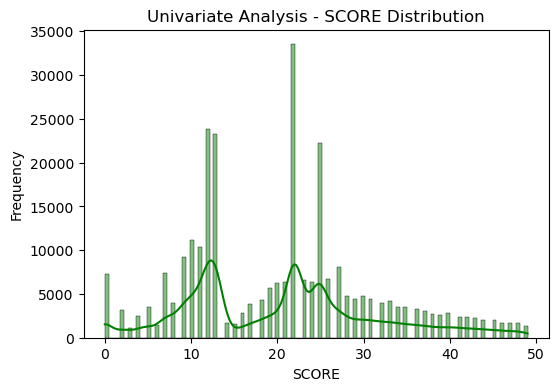

In [50]:
plt.figure(figsize=(6,4))
sns.histplot(nyc["SCORE"], kde=True, color="green")
plt.title("Univariate Analysis - SCORE Distribution")
plt.xlabel("SCORE")
plt.ylabel("Frequency")
plt.show()

### Insights
- Most of the scores falls between 10 and 30.
- The most significant peak is around the score of 23, means most restaurants have the common score.
- A few restaurants have very high scores, meaning more violations indicating poor hygiene or safety standards.
- The uneven score pattern suggests that some restaurants consistently perform better than others in inspections.

### Analyzing Geographical trends using Countplot,by counting how many inspections occurred in each borough (BORO).

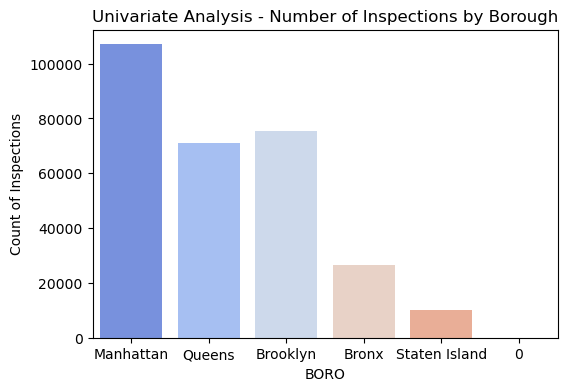

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(data=nyc, x='BORO', palette='coolwarm')
plt.title('Univariate Analysis - Number of Inspections by Borough')
plt.xlabel('BORO')
plt.ylabel('Count of Inspections')
plt.show()

### Insights
- Manhattan and Brooklyn have the highest number of inspections, showing they have the most restaurants.
- Staten Island has the fewest inspections, meaning fewer food outlets operate there.
- The large difference between boroughs suggests uneven restaurant distribution across NYC.

## 2.Bivariate Analysis
### The violin plot of SCORE by GRADE shows patterns in inspection scores & reveals trends across grades.

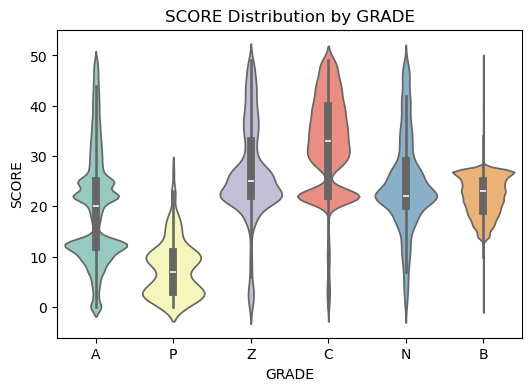

In [52]:
plt.figure(figsize=(6,4))
sns.violinplot(data=nyc, x='GRADE', y='SCORE', palette='Set3')
plt.title("SCORE Distribution by GRADE")
plt.xlabel("GRADE")
plt.ylabel("SCORE")
plt.show()

### Insights
- Scores vary by grade, this shows different performance levels.
- Grades C and Z have higher scores than others.
- Grade P has the lowest scores, which indicating weaker performance.
- This helps to identify restaurants needing attention.

### Lineplot for analyzing Time-Based Trend by using two variables SCORE & INSPECTION DATE by how the average score changes over time.

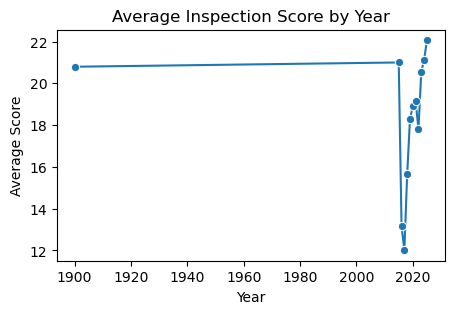

In [53]:
nyc['Year'] = nyc['INSPECTION DATE'].dt.year
plt.figure(figsize=(5,3))
sns.lineplot(data=nyc, x='Year', y='SCORE', ci=None, marker='o')
plt.title('Average Inspection Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

### Insights
- Inspection scores improved over the years, showing better hygiene awareness.
- Some years show score drops, possibly due to stricter inspection rules or new policies.
- The overall upward trend indicates positive progress in food safety standards across NYC restaurants.

## 3.Multivariate Analysis
### Barplot to analyze patterns in inspection scores across grades,identifying areas for improvement & trends in restaurant performance (SCORE by GRADE & ACTION).

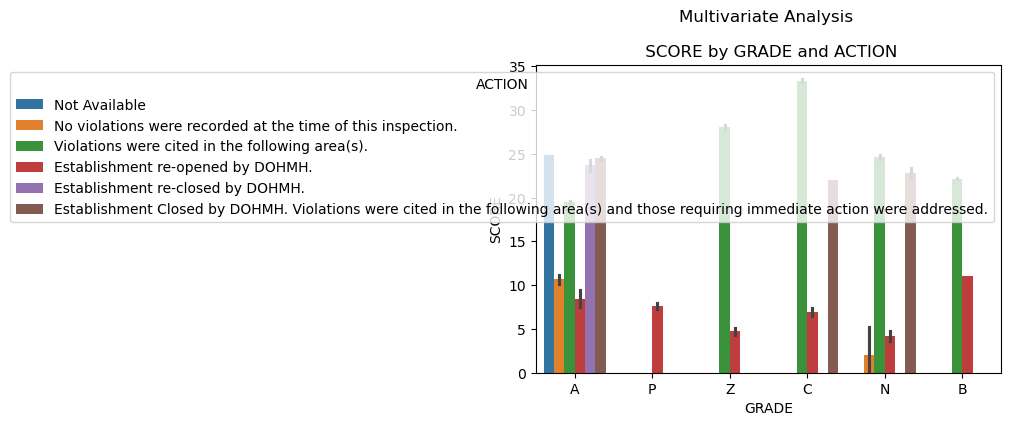

In [54]:
plt.figure(figsize=(6,4))
sns.barplot(x='GRADE', y='SCORE', hue='ACTION', data=nyc)
plt.title("Multivariate Analysis \n\n SCORE by GRADE and ACTION")
plt.show()

### Insights
- The majority of restaurants receiving "Grade A" had no recorded violations during inspection.
- Establishments that were closed or re-closed by the DOHMH generally received lower health grades like 'N' or 'C'.

### CORRELATION HEATMAP
### Converting CRITICAL FLAG to numeric to analyze the violations based on the inspection SCORE.

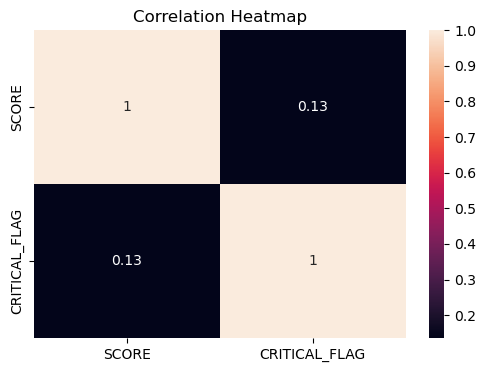

In [55]:
nyc['CRITICAL_FLAG'] = nyc['CRITICAL FLAG'].map({'Not Critical': 0, 'Critical': 1})

num_cols = ['SCORE', 'CRITICAL_FLAG']

corr_matrix = nyc[num_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Insights
- Both SCORE and CRITICL_FLAG show a perfect positive self-correlation of 1.0, means both variables move together.
- A very weak positive correlation(0.13) exists between two variables.
- Which indicating that higher scores are only minimally realated to having a critical violation flag.
- The low correlation suggests that critical violations are not the primary key of restaurant's final health inspection score.

## Overall Insights
- Most NYC restaurants maintain good hygiene, achieving grade A.
- A few restaurants consistently score low, indicating poor compliance.
- Inspection scores vary by borough, with Manhattan and Brooklyn having the most inspections.
- Scores have generally improved over the years, showing better food safety awareness.
- Restaurants with critical violations have higher scores and need more attention.
- Tracking scores and grades over time helps see improvement and focus on risky restaurant.
- Data highlights areas and restaurants needing targeted improvement for public health safety.